In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [4]:
df = pd.read_csv('nasdq.csv')
df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3914 non-null   object 
 1   Open          3914 non-null   float64
 2   High          3914 non-null   float64
 3   Low           3914 non-null   float64
 4   Close         3914 non-null   float64
 5   Volume        3914 non-null   float64
 6   InterestRate  3914 non-null   float64
 7   ExchangeRate  3914 non-null   float64
 8   VIX           3914 non-null   float64
 9   TEDSpread     3914 non-null   float64
 10  EFFR          3914 non-null   float64
 11  Gold          3914 non-null   float64
 12  Oil           3914 non-null   float64
dtypes: float64(12), object(1)
memory usage: 397.6+ KB


In [6]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
TEDSpread       0
EFFR            0
Gold            0
Oil             0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
count,3914.000000,3914.000000,3914.000000,3914.000000,3.914000e+03,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000
mean,29.218649,29.491567,28.943843,29.226927,3.708611e+06,1.191165,1.191561,18.374990,0.241193,1.189384,1531.077030,72.019456
std,19.669386,19.840919,19.486496,19.668668,3.035420e+06,1.686064,0.113733,6.965917,0.148833,1.684429,330.904451,21.470288
min,5.820000,5.916667,5.726667,5.766667,5.754000e+05,0.050000,0.961600,9.140000,0.060000,0.040000,1050.800049,-37.630001
25%,10.995000,11.101667,10.890000,11.024167,2.035875e+06,0.090000,1.100000,13.570000,0.130000,0.090000,1257.425018,53.185000
50%,23.708333,23.858334,23.575001,23.733334,2.834950e+06,0.190000,1.159100,16.605000,0.210000,0.190000,1422.049988,73.465000
75%,47.375001,47.807499,46.804999,47.330002,4.276500e+06,1.700000,1.295575,21.157500,0.320000,1.700000,1778.574982,89.877499
max,75.599998,75.680000,74.050003,75.239998,5.478960e+07,5.330000,1.487500,82.690000,1.420000,5.330000,2760.800049,123.699997


<Axes: xlabel='Date', ylabel='Open'>

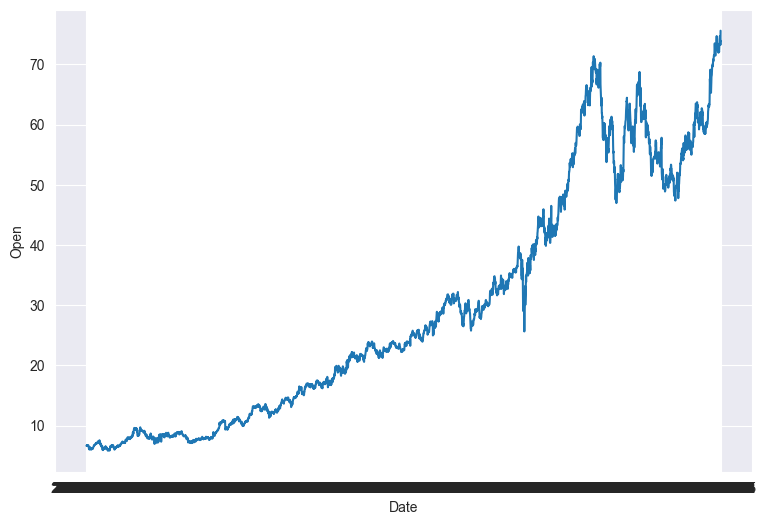

In [8]:
plt.figure(figsize=(9, 6))
sns.lineplot(x='Date', y='Open', data=df)

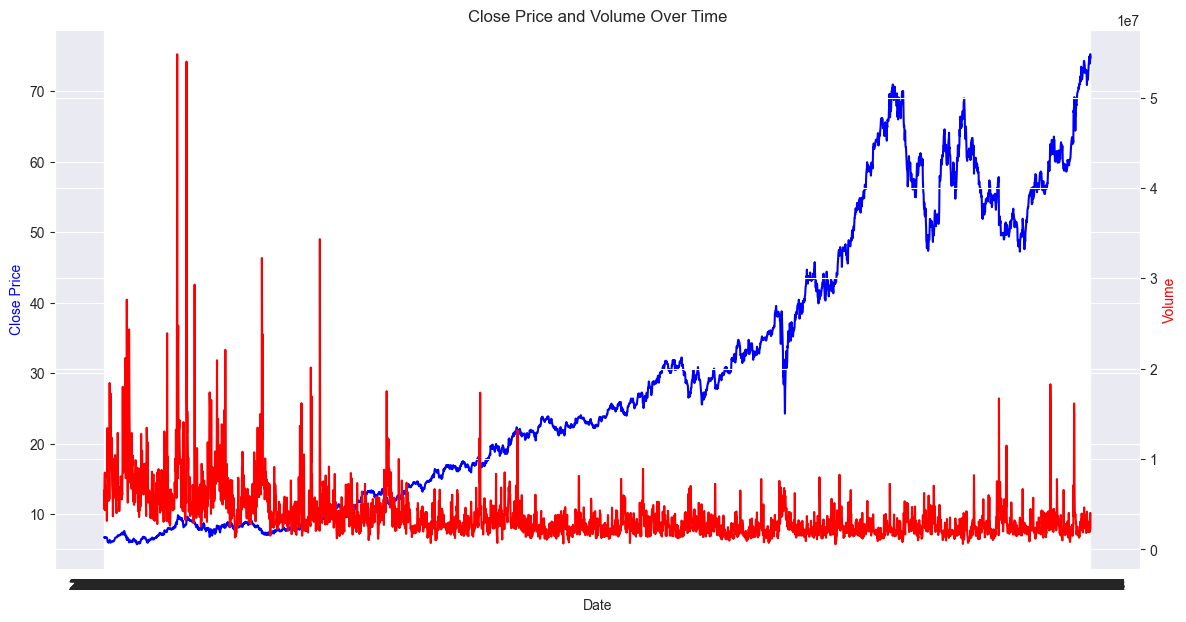

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(x='Date', y='Close', data=df, ax=ax1, color='b')
ax1.set_ylabel('Close Price', color='b')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Volume', data=df, ax=ax2, color='r')
ax2.set_ylabel('Volume', color='r')

plt.title('Close Price and Volume Over Time')
plt.show()


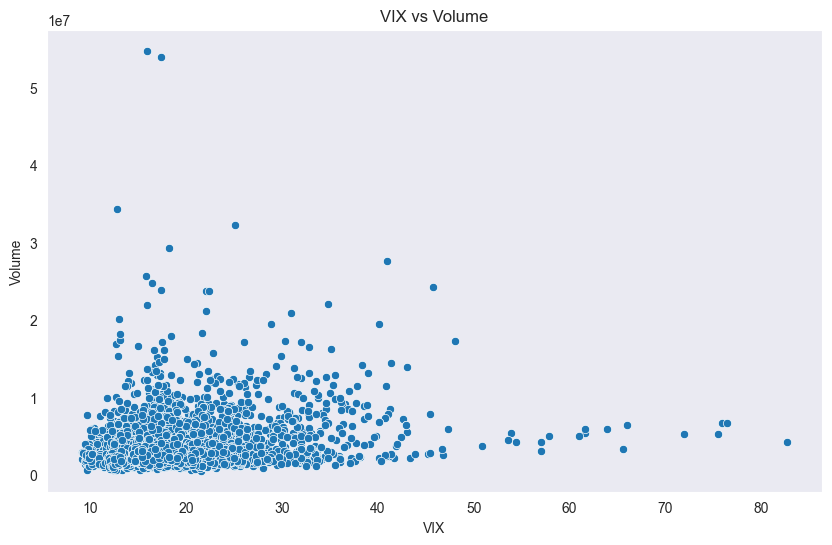

Correlation beetwen VIX and Volume 0.21


In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VIX', y='Volume', data=df)
plt.title('VIX vs Volume')
plt.xlabel('VIX')
plt.ylabel('Volume')
plt.grid()
plt.show()

correlation = df[['VIX', 'Volume']].corr().iloc[0, 1]
print(f'Correlation beetwen VIX and Volume {correlation:.2f}')


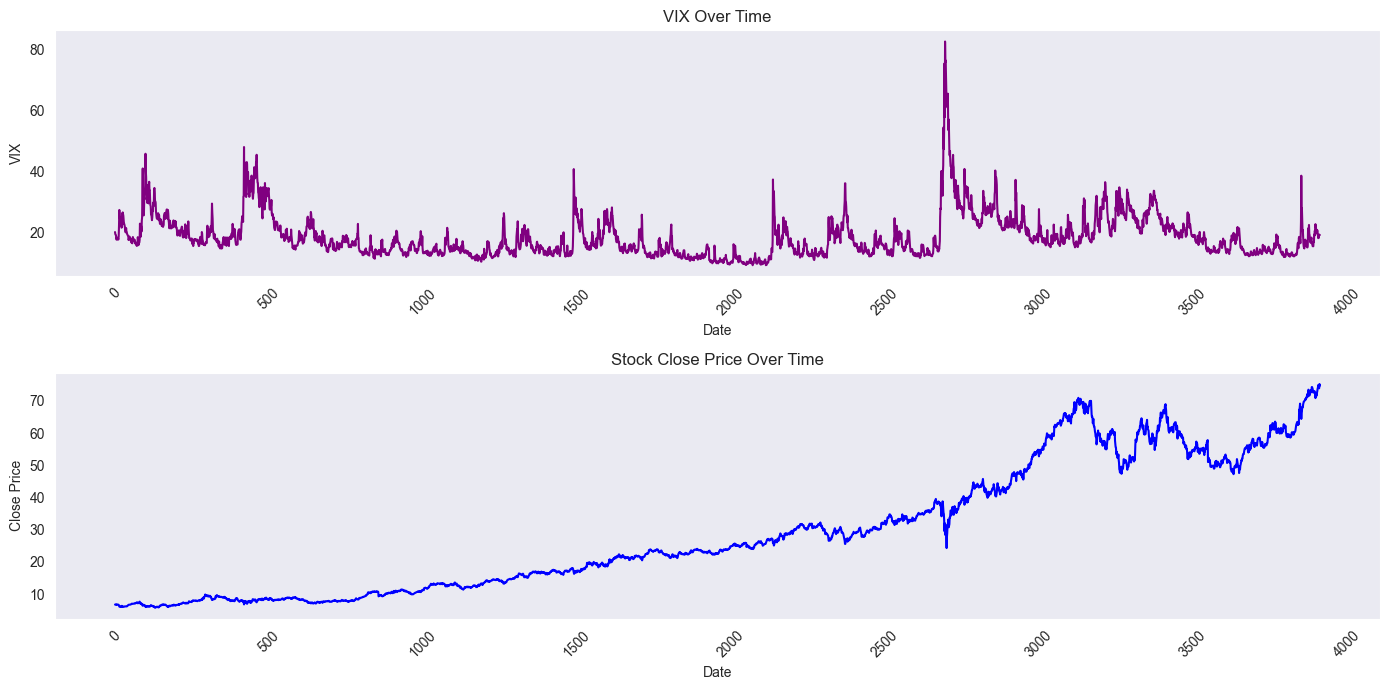

In [11]:
plt.figure(figsize=(14, 7))

# Plot VIX
plt.subplot(2, 1, 1)
plt.plot(df.index, df['VIX'], label='VIX', color='purple')
plt.title('VIX Over Time')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.grid()
plt.xticks(rotation=45)

# Plot Close Price
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
df = df.drop(columns=['Date'])
df.corr()

,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
Open,1.000000,0.999890,0.999870,0.999745,-0.391028,0.632007,-0.680351,0.093826,-0.453715,0.630389,0.713891,-0.141258
High,0.999890,1.000000,0.999848,0.999879,-0.388806,0.631432,-0.680459,0.097571,-0.452561,0.629804,0.714077,-0.141446
Low,0.999870,0.999848,1.000000,0.999891,-0.393163,0.633342,-0.680427,0.089102,-0.454572,0.631751,0.713692,-0.140867
Close,0.999745,0.999879,0.999891,1.000000,-0.391036,0.632332,-0.680449,0.092566,-0.453460,0.630756,0.713888,-0.141233
Volume,-0.391028,-0.388806,-0.393163,-0.391036,1.000000,-0.215920,0.450332,0.209931,0.058109,-0.215868,-0.125825,0.257353
InterestRate,0.632007,0.631432,0.633342,0.632332,-0.215920,1.000000,-0.533438,-0.144047,-0.329405,0.998881,0.561163,-0.001836
ExchangeRate,-0.680351,-0.680459,-0.680427,-0.680449,0.450332,-0.533438,1.000000,-0.012714,0.036657,-0.532744,-0.246335,0.544608
VIX,0.093826,0.097571,0.089102,0.092566,0.209931,-0.144047,-0.012714,1.000000,0.159719,-0.146656,0.215763,-0.076757
TEDSpread,-0.453715,-0.452561,-0.454572,-0.453460,0.058109,-0.329405,0.036657,0.159719,1.000000,-0.333485,-0.429599,-0.336378
EFFR,0.630389,0.629804,0.631751,0.630756,-0.215868,0.998881,-0.532744,-0.146656,-0.333485,1.000000,0.558592,-0.001894


<Axes: >

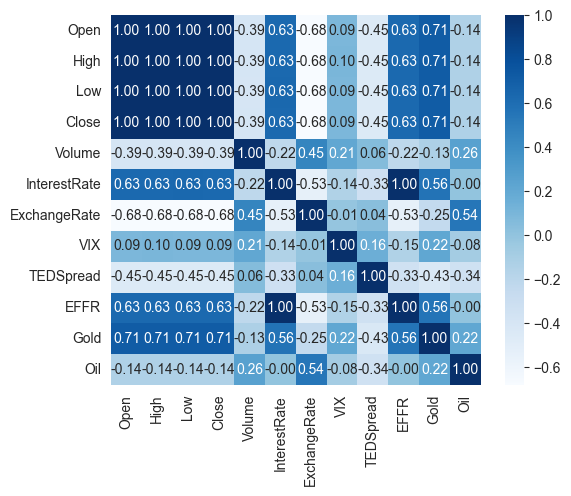

In [13]:
sns.heatmap(df.corr(), annot=True,fmt=".2f", cmap='Blues', square=True)

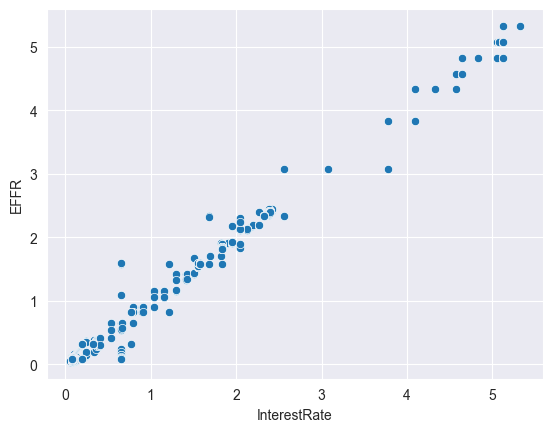

In [14]:
sns.scatterplot(data=df, x= 'InterestRate', y='EFFR')
plt.show()

## Splitting the train and test data

In [15]:
X= df.drop(columns=['Close'])  
y= df['Close']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [16]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
pred = lrmodel.predict(X_test)

lmse = mean_squared_error(y_test, pred)
lrmse = np.sqrt(lmse)
print(f'mean square error: {lmse}, Root mean Square {lrmse}')

mean square error: 0.03712934782618582, Root mean Square 0.1926897709433114


In [19]:
cm = confusion_matrix(pred, y_test)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.show()

ValueError: continuous is not supported

### Random Forest Regressor

In [39]:
rmrmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rmrmodel.fit(X_train, y_train)

predictions = rmrmodel.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}, Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0669219614829142, Root Mean Squared Error: 0.2586927936431825


### Pollynomial Regression

In [40]:
polyreg = make_pipeline(PolynomialFeatures(4), LinearRegression())
polyreg.fit(X_train, y_train)

poly_predictions = polyreg.predict(X_test)

pmse = mean_squared_error(y_test, predictions)
prmse = np.sqrt(mse)
print(f'Mean Squared Error: {pmse}, Root Mean Squared Error: {prmse}')


Mean Squared Error: 0.0669219614829142, Root Mean Squared Error: 0.2586927936431825


In [43]:

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

tmse = mean_squared_error(y_test, predictions)
trmse = np.sqrt(mse)
print(f'Mean Squared Error: {tmse}, Root Mean Squared Error: {trmse}')

Mean Squared Error: 0.0669219614829142, Root Mean Squared Error: 0.2586927936431825
